# Example notebook for piol420
Loading libs

In [24]:
import matplotlib.pyplot as plt
import numpy as np

Generating random data

In [ ]:
n = 1000

scale = 0.5
r = scale * np.random.randn(n)

ampFactor = 1.
x = np.linspace(0,2*np.pi,n)
y = ampFactor * np.sin(x) +  r


## Dealing with Funky (non-parametric) distributions

* we will collect (generate) temperature distributions from two cities.
* we will then determine what the difference between those temperatures are,
* then we will find the confidence interface for that difference (using bootstrapping)

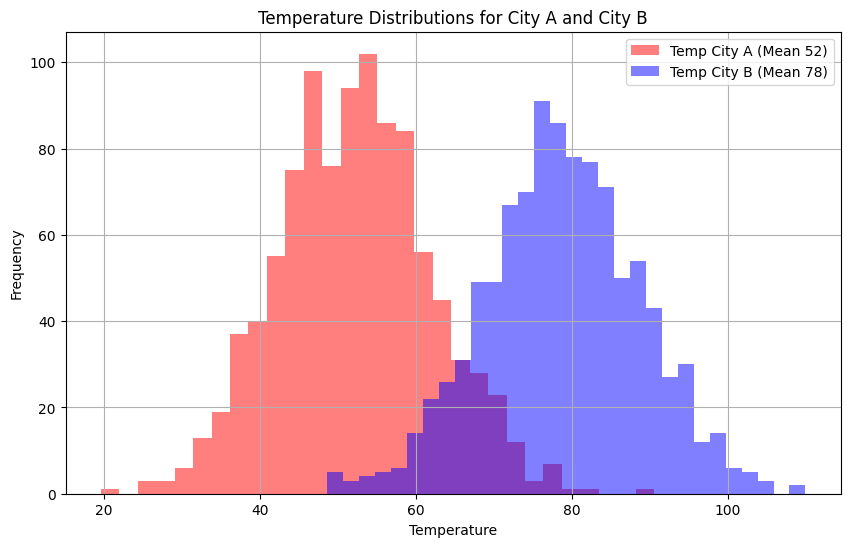

In [25]:
np.random.seed(42) # for reproducibility

# Assuming a standard deviation (std_dev) of 10 as per previous context
std_dev = 10
num_points = 1000

tempCityA = np.random.normal(loc=52., scale=std_dev, size=num_points)
tempCityB = np.random.normal(loc=78., scale=std_dev, size=num_points)

plt.figure(figsize=(10, 6))
plt.hist(tempCityA, bins=30, alpha=0.5, color='red', label='Temp City A (Mean 52)')
plt.hist(tempCityB, bins=30, alpha=0.5, color='blue', label='Temp City B (Mean 78)')
plt.title('Temperature Distributions for City A and City B')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

* Let's bootstrap and get confidence intervals


Mean of the difference: 27.072357252537675
5th percentile: 3.2197603816509712
95th percentile: 48.82227511305813


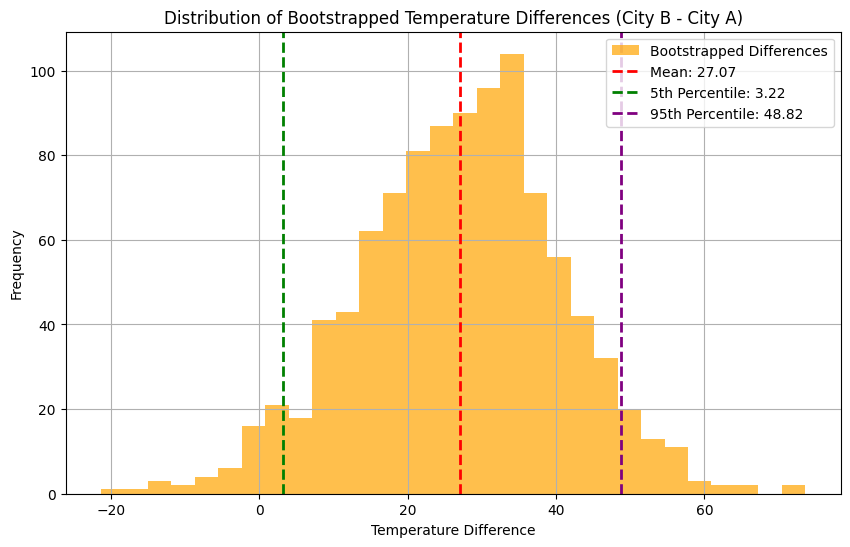

In [27]:
np.random.seed(42) # for reproducibility

# Take 1001 random entries from tempCityA and tempCityB (with replacement)
sampled_data_a = np.random.choice(tempCityA, size=1001, replace=True)
sampled_data_b = np.random.choice(tempCityB, size=1001, replace=True)

# Take the difference between the two arrays
difference = sampled_data_b - sampled_data_a

# Sort the difference
sorted_difference = np.sort(difference)

# Plot the histogram of the differences
plt.figure(figsize=(10, 6))
plt.hist(sorted_difference, bins=30, color='orange', alpha=0.7, label='Bootstrapped Differences')

# Calculate and print the mean
mean_difference = np.mean(sorted_difference)
print(f"Mean of the difference: {mean_difference}")

# Calculate and print the 5th percentile (0.05 * 1001th entry)
percentile_5 = sorted_difference[np.floor(0.05 * 1001).astype(int)]
print(f"5th percentile: {percentile_5}")

# Calculate and print the 95th percentile (0.95 * 1001th entry)
percentile_95 = sorted_difference[np.floor(0.95 * 1001).astype(int)]
print(f"95th percentile: {percentile_95}")

# Add vertical lines for mean and percentiles to the plot
plt.axvline(mean_difference, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_difference:.2f}')
plt.axvline(percentile_5, color='green', linestyle='dashed', linewidth=2, label=f'5th Percentile: {percentile_5:.2f}')
plt.axvline(percentile_95, color='purple', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95:.2f}')

plt.title('Distribution of Bootstrapped Temperature Differences (City B - City A)')
plt.xlabel('Temperature Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


This data suggests that 90% of the time we repeat this analysis, the calculated intervals would contain the true mean. Also, since the confidence interval does not contain 0, the temperatures in city B are significantly warmer than city A